In [1]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)
import pickle

from itertools import product, combinations

from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
import tqdm as tqdm
from scipy.stats import chi2_contingency
import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_ajuste_modelos as f

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split,GridSearchCV
# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys




pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_preprocesado=pd.read_pickle("../../datos/datos2/datos_out_balanced.pkl").reset_index(drop=True)

## XGBOOST

### Modelo A

In [3]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_xgboost2.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [4]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,0.99,0.99,0.99,0.99,0.95,1.00
test,0.84,0.82,0.84,0.82,0.39,0.77


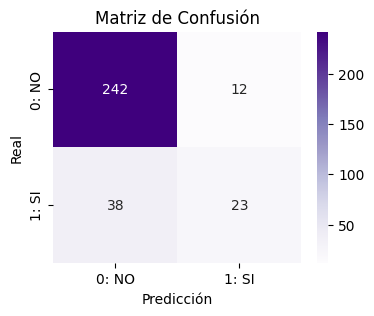

In [5]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

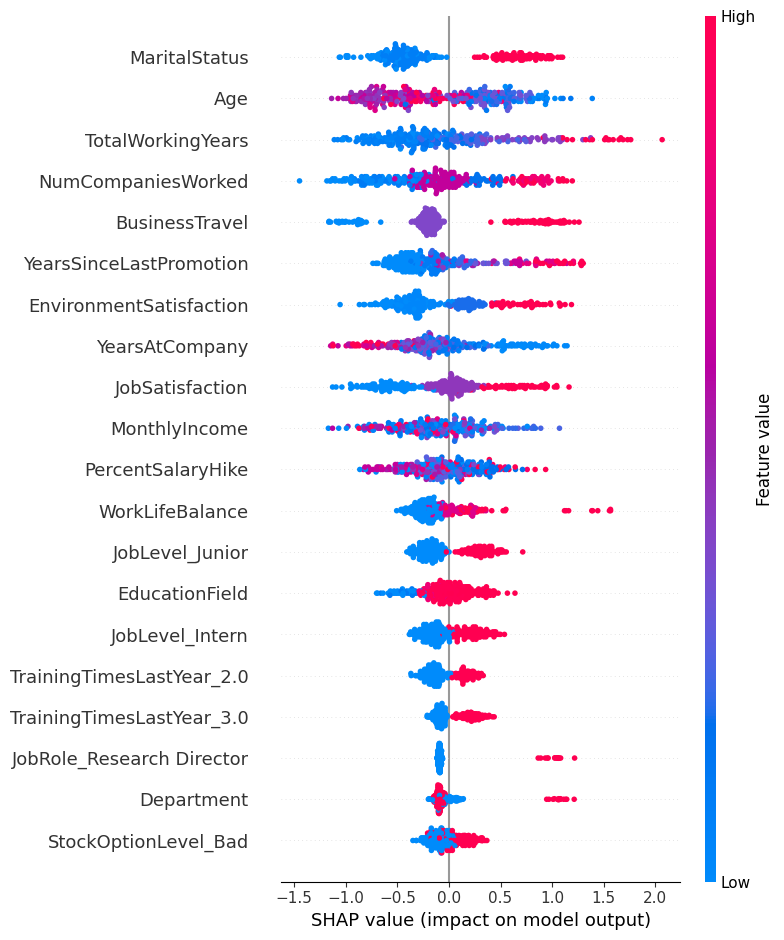

In [6]:
modelos_clasificacion.plot_shap_summary("xgboost")

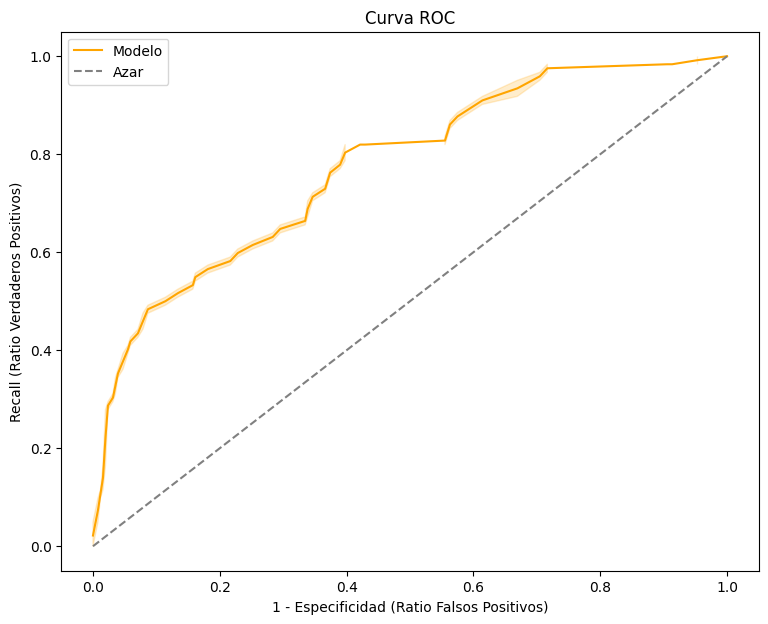

In [7]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

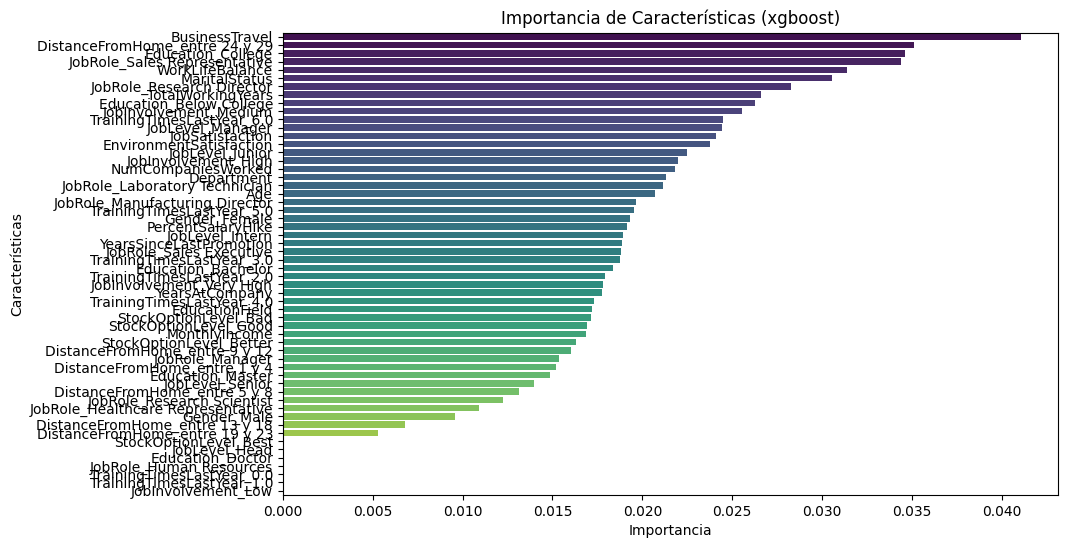

In [8]:
modelos_clasificacion.importancia_predictores("xgboost")

### Con 0.7  
### Modelo A.7  

In [9]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_xgboost2.7.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [10]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,0.98,0.98,0.98,0.98,0.91,1.00
test,0.85,0.82,0.85,0.82,0.28,0.76


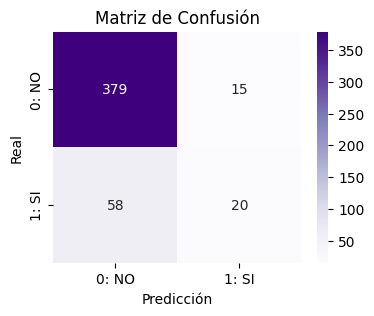

In [11]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

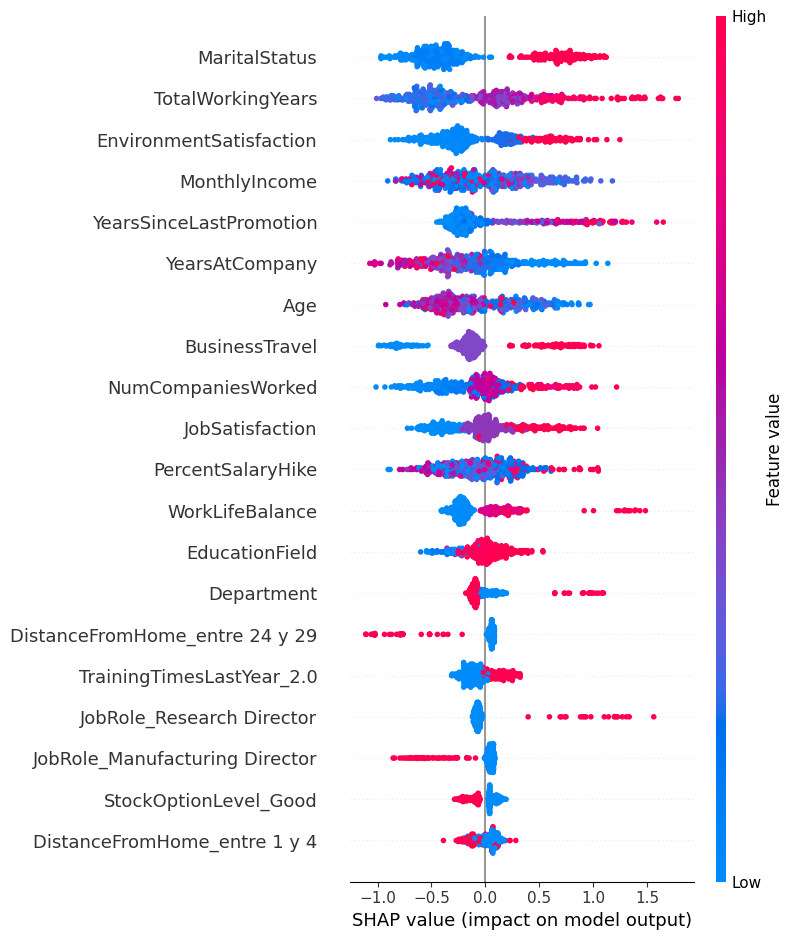

In [12]:
modelos_clasificacion.plot_shap_summary("xgboost")

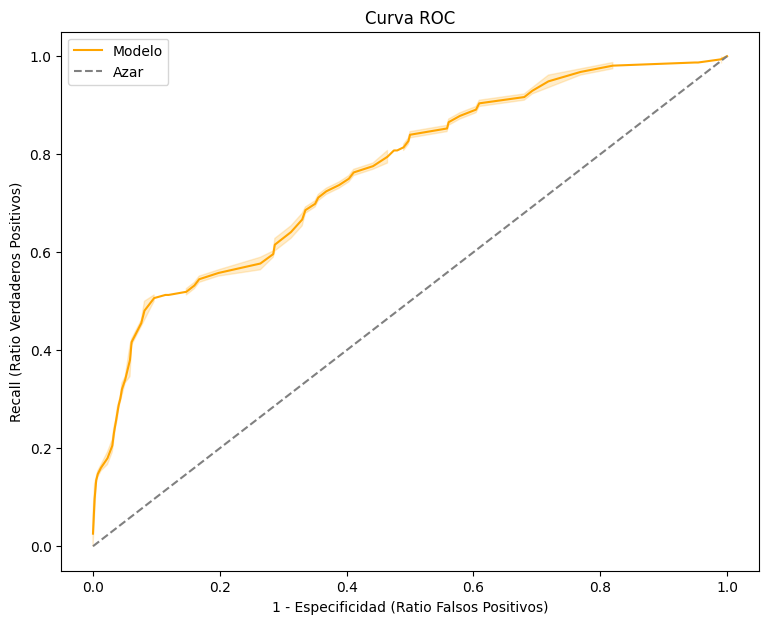

In [13]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

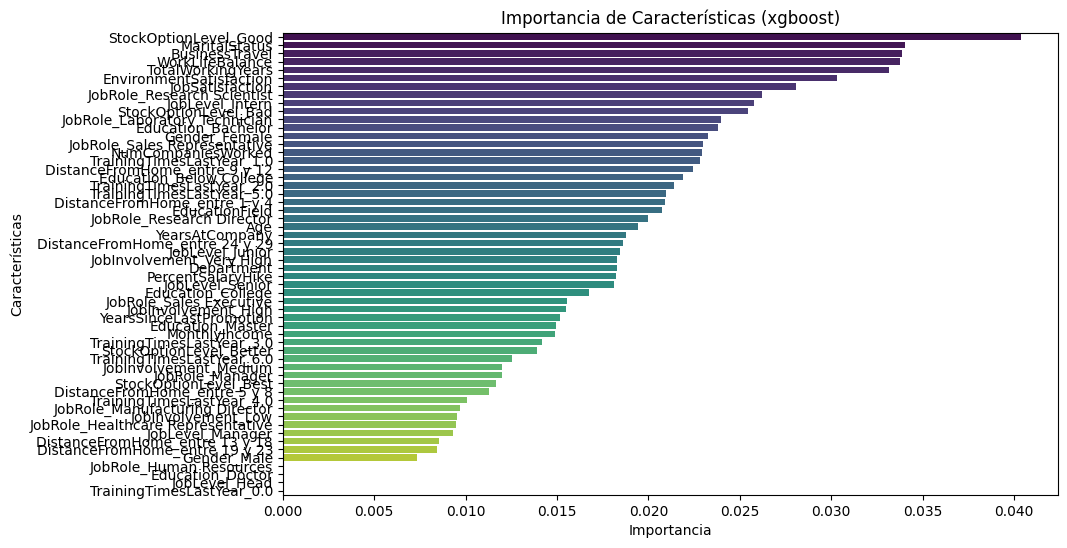

In [14]:
modelos_clasificacion.importancia_predictores("xgboost")

## Ahora probando con parametros

## XGBOOST

### Modelo B

In [15]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid={'n_estimators': [150, 250],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [4, 5,6,10],
 'min_child_weight': [3, 5,8],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_xgboost2B.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [16]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,1.00,1.00,1.00,1.00,1.00,1.00
test,0.85,0.83,0.85,0.83,0.40,0.79


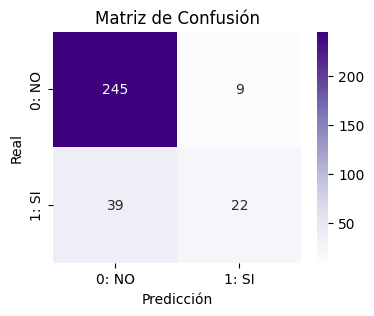

In [17]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

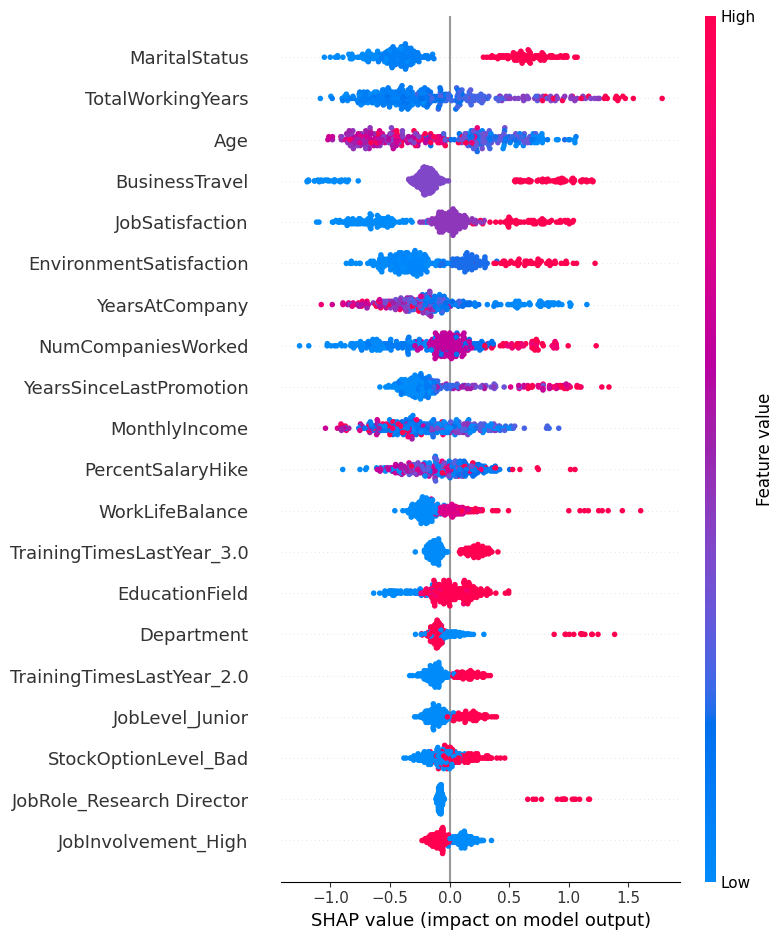

In [18]:
modelos_clasificacion.plot_shap_summary("xgboost")

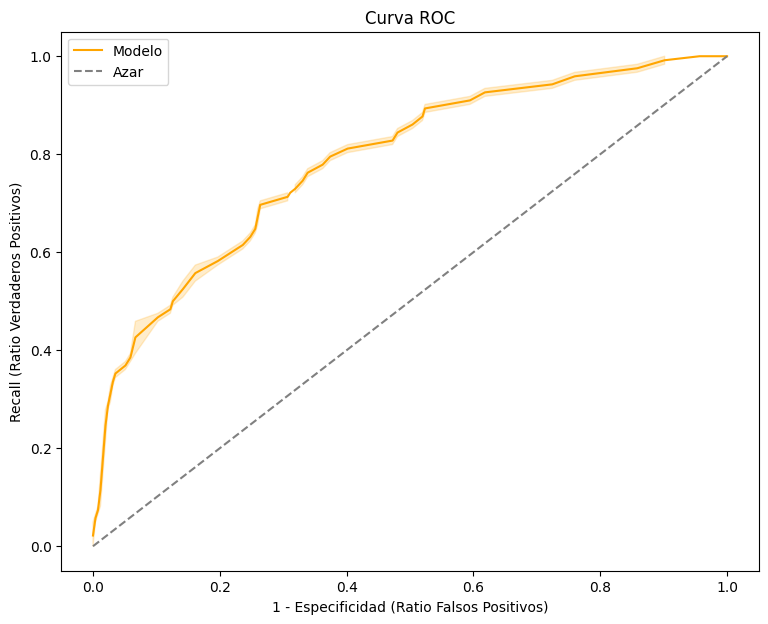

In [19]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

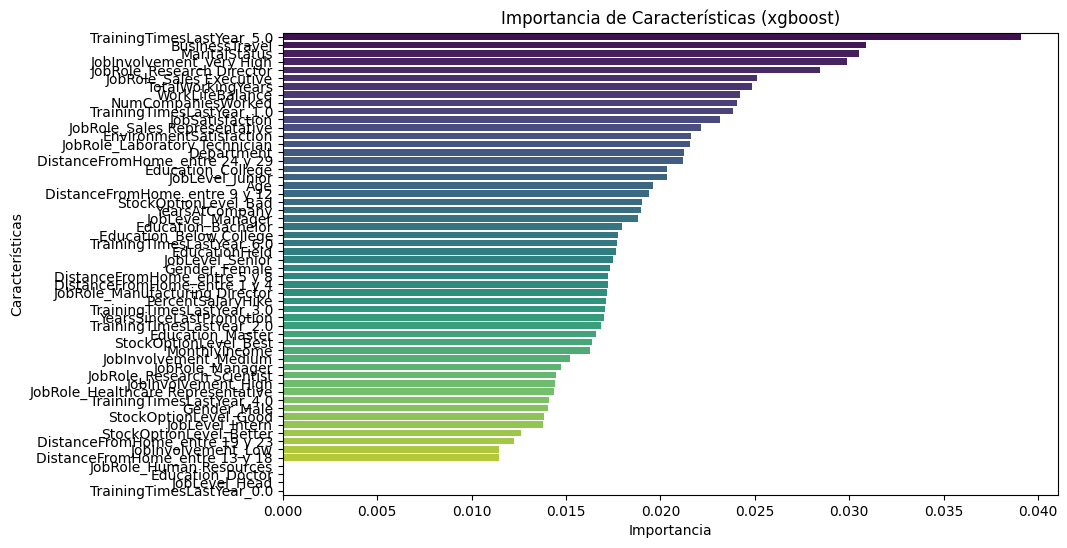

In [20]:
modelos_clasificacion.importancia_predictores("xgboost")

### Con 0.7  
### Modelo B.7  

In [21]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid={'n_estimators': [150, 250],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [4, 5,6,10],
 'min_child_weight': [3, 5,8],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_xgboost2.B.7.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [22]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,1.00,1.00,1.00,1.00,1.00,1.00
test,0.86,0.84,0.86,0.83,0.32,0.77


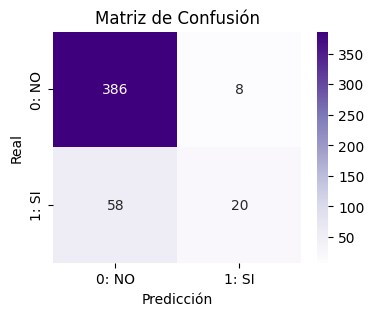

In [23]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

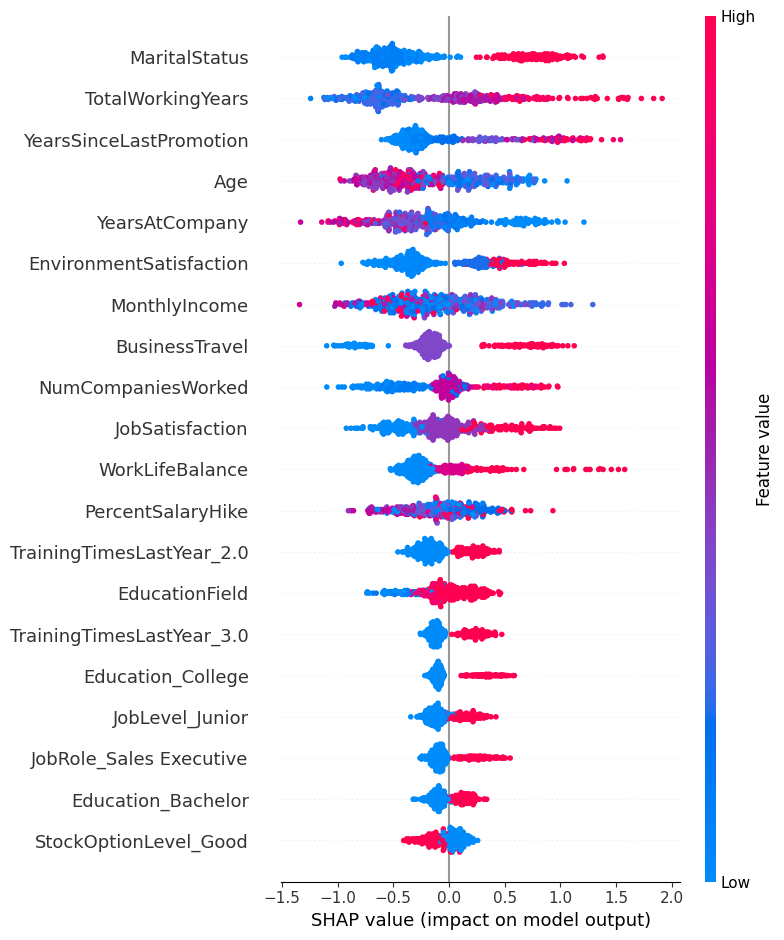

In [24]:
modelos_clasificacion.plot_shap_summary("xgboost")

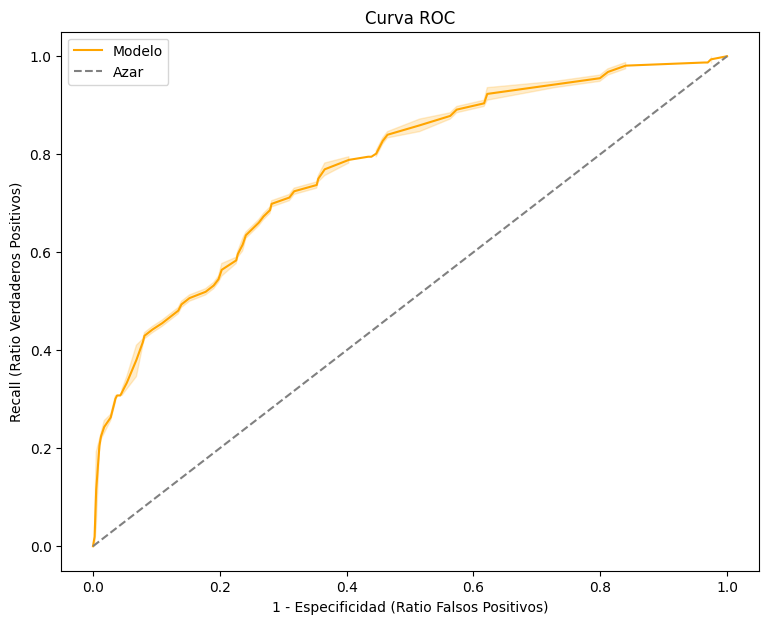

In [25]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

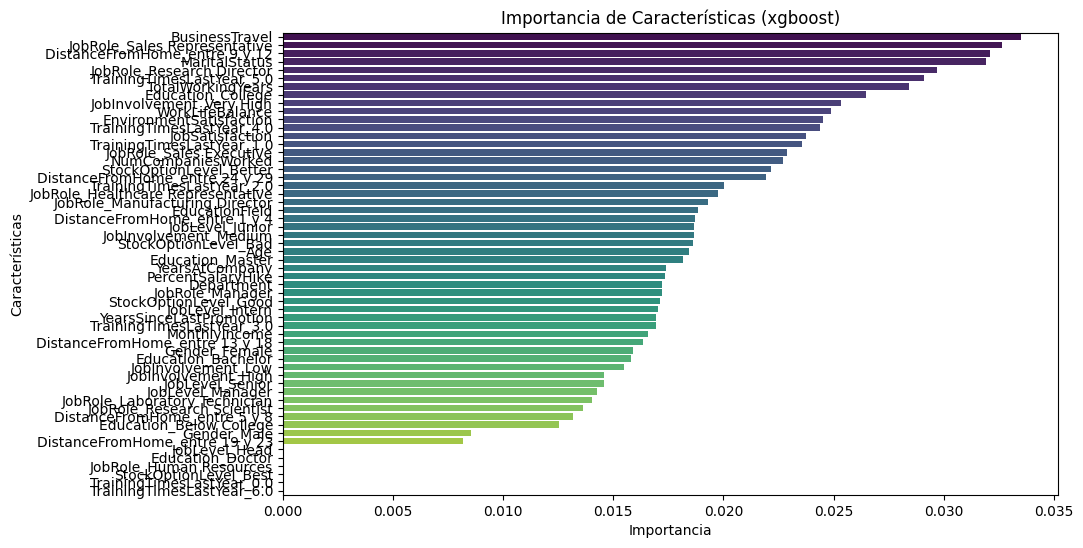

In [26]:
modelos_clasificacion.importancia_predictores("xgboost")

### Modelo C


In [27]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid={'n_estimators': [210, 270],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [4, 5,6,8],
 'min_child_weight': [3, 4,5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_xgboost2C.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=270, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [28]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,1.00,1.00,1.00,1.00,1.00,1.00
test,0.84,0.83,0.84,0.82,0.39,0.79


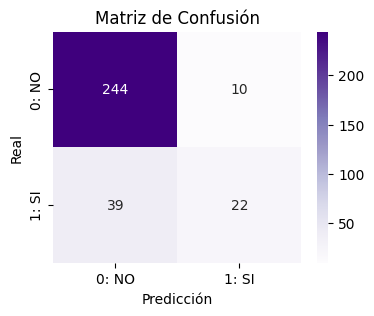

In [29]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

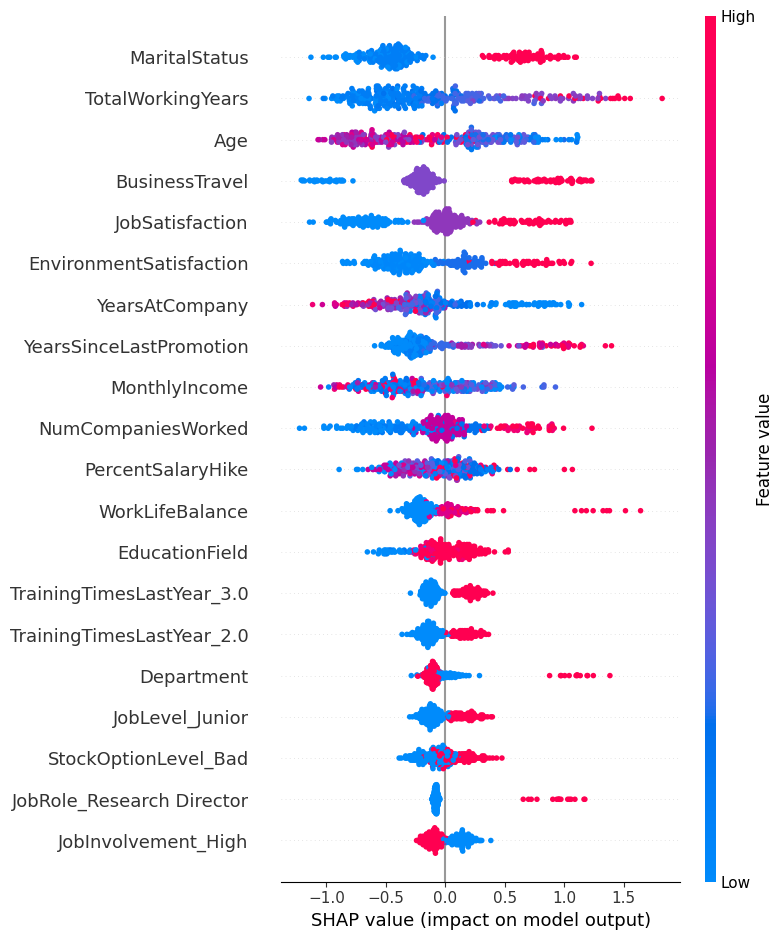

In [30]:
modelos_clasificacion.plot_shap_summary("xgboost")

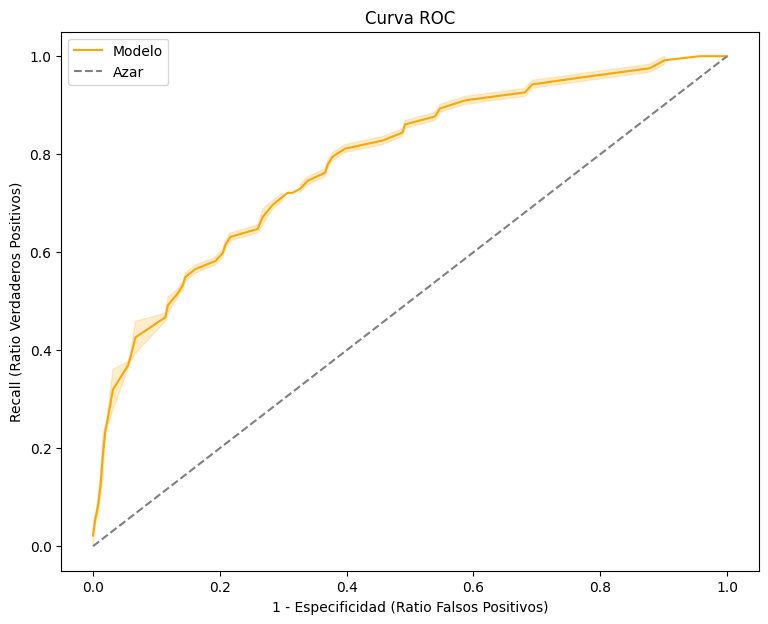

In [31]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

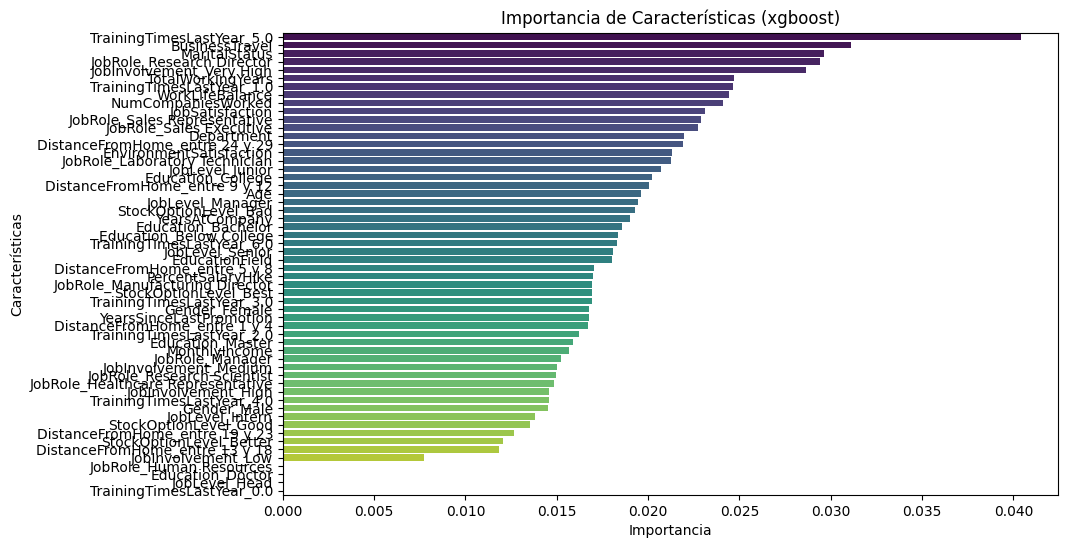

In [32]:
modelos_clasificacion.importancia_predictores("xgboost")

### Con 0.7  
### Modelo C.7  

In [50]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid={'n_estimators': [210, 270],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [4, 5,6,8],
 'min_child_weight': [3, 4,5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2",nombre_modelo_guardar="modelo_xgboost2.C.7.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=270, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [51]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,0.98,0.98,0.98,0.98,0.91,1.00
test,0.86,0.84,0.86,0.83,0.34,0.77


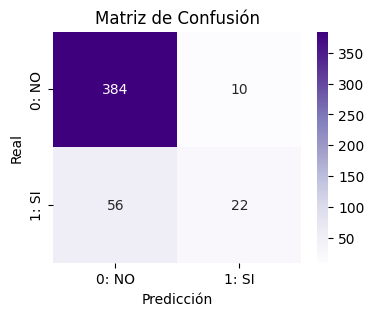

In [52]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

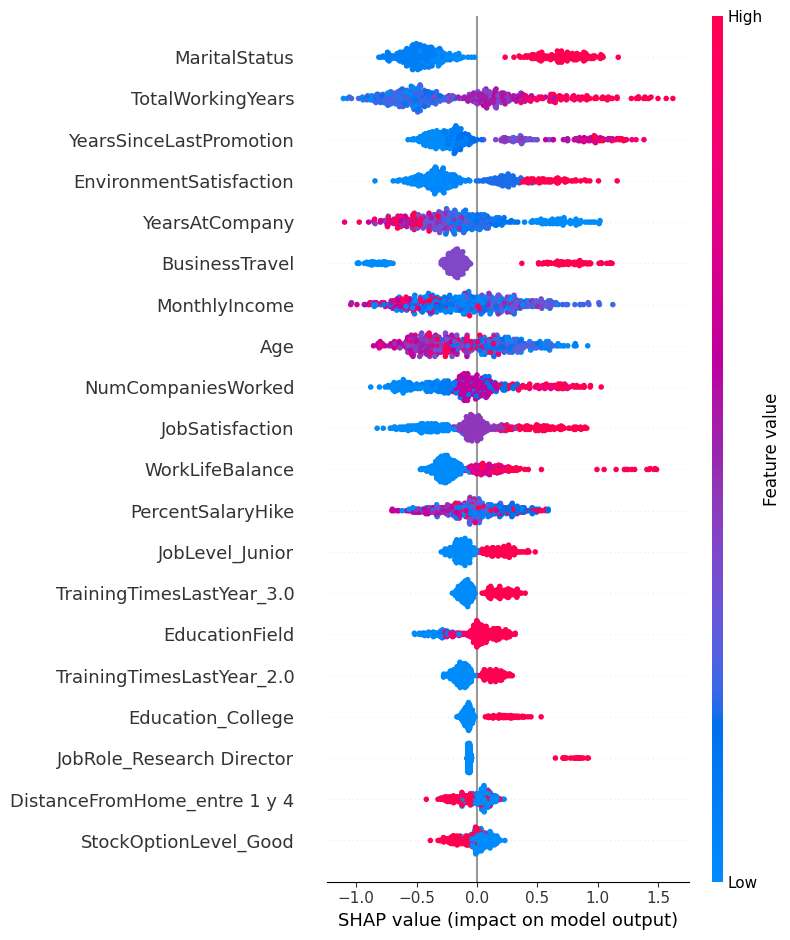

In [53]:
modelos_clasificacion.plot_shap_summary("xgboost")

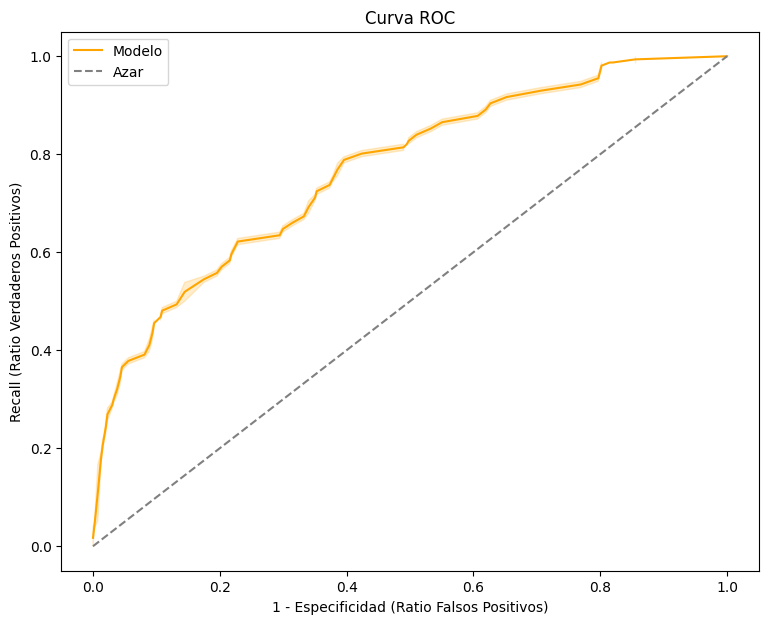

In [54]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

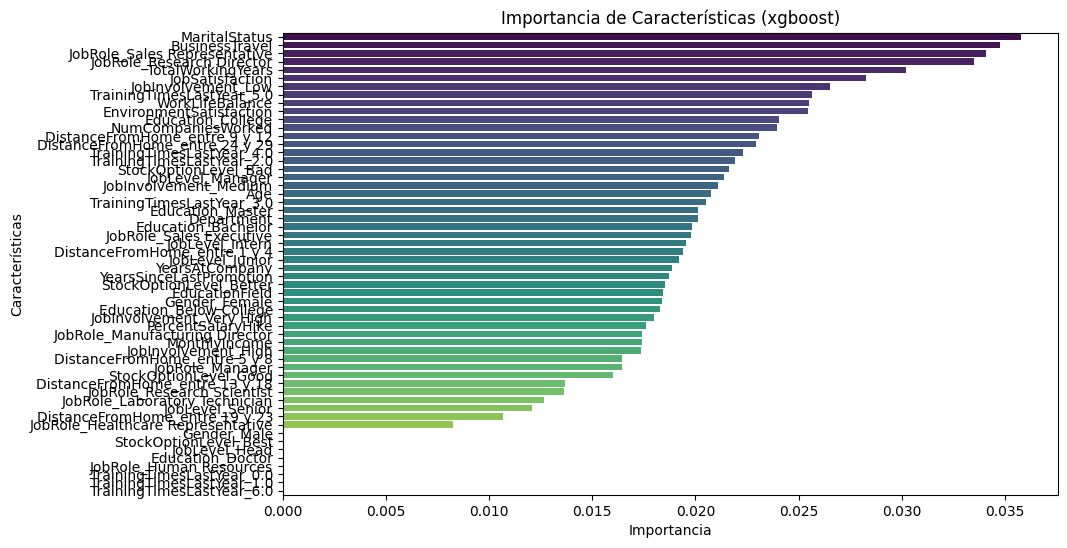

In [55]:
modelos_clasificacion.importancia_predictores("xgboost")

### Modelo D


In [39]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid={'n_estimators': [260, 280],
 'learning_rate': [0.01, 0.05, 0.1, 0.2],
 'max_depth': [4, 5,6,8],
 'min_child_weight': [3, 4,5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_xgboost2D.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=260, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [40]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,1.00,1.00,1.00,1.00,0.99,1.00
test,0.84,0.82,0.84,0.82,0.37,0.76


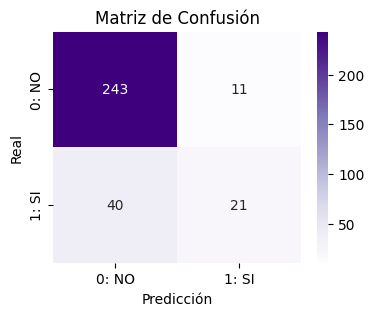

In [41]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

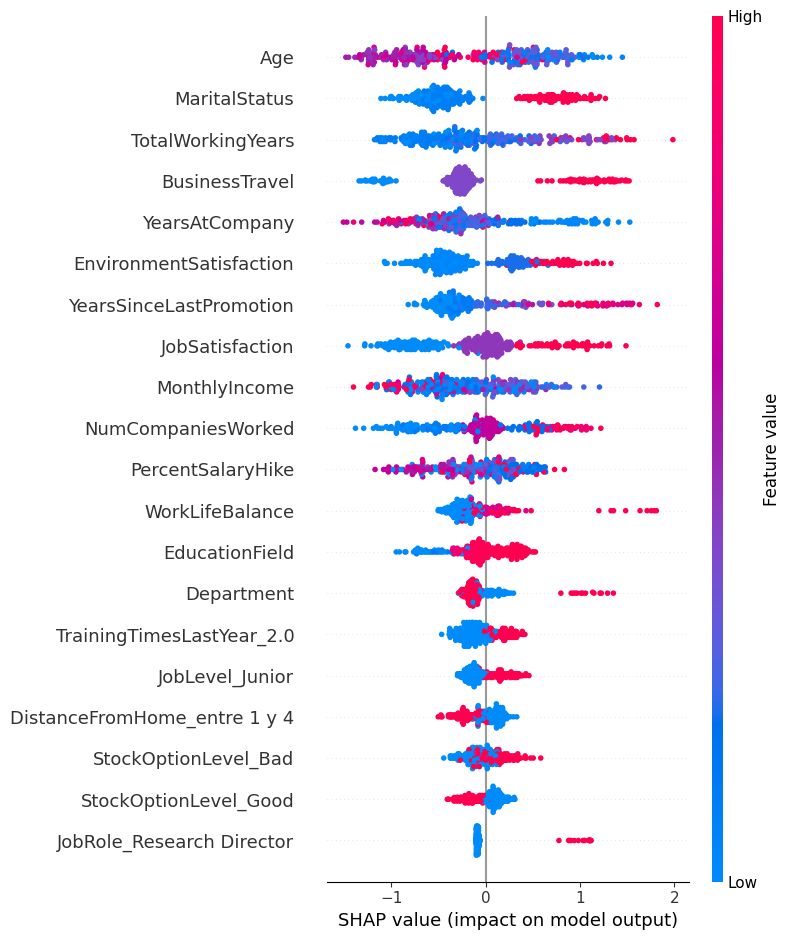

In [42]:
modelos_clasificacion.plot_shap_summary("xgboost")

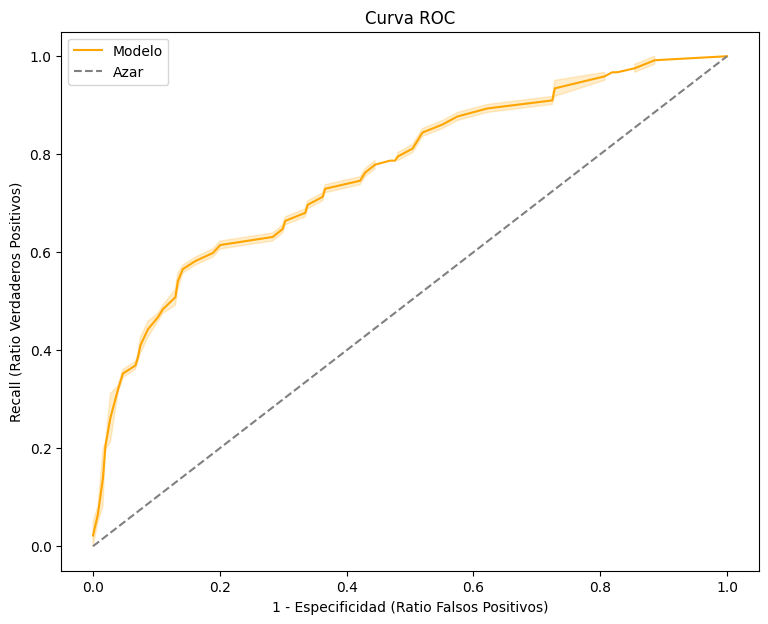

In [43]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

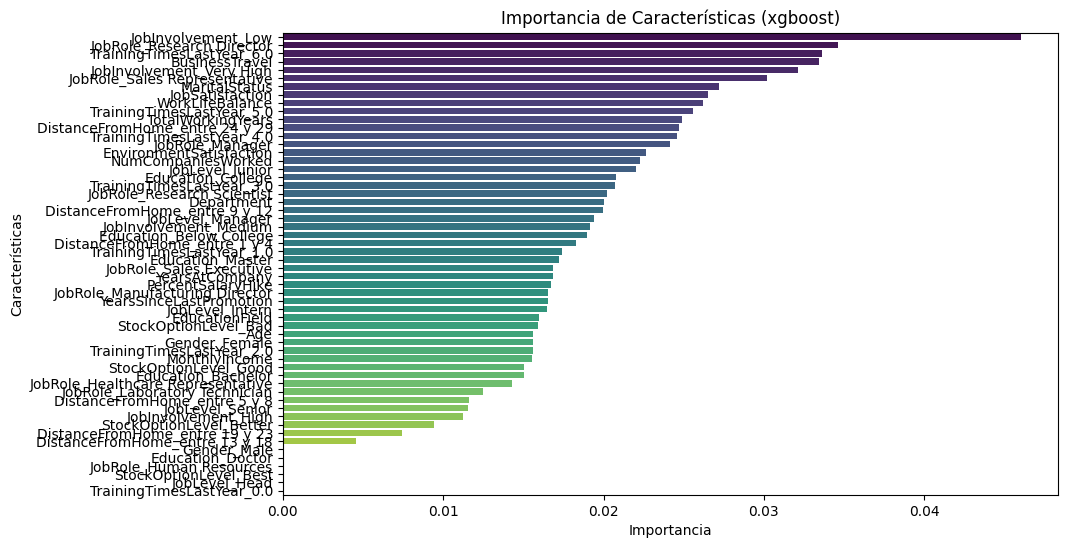

In [44]:
modelos_clasificacion.importancia_predictores("xgboost")

### Modelo D.7


In [45]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid={'n_estimators': [260, 280],
 'learning_rate': [0.01, 0.05, 0.1, 0.2],
 'max_depth': [4, 5,6,8],
 'min_child_weight': [3, 4,5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_xgboost2.D.7.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=280, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [46]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,0.98,0.98,0.98,0.98,0.93,1.00
test,0.86,0.84,0.86,0.83,0.32,0.77


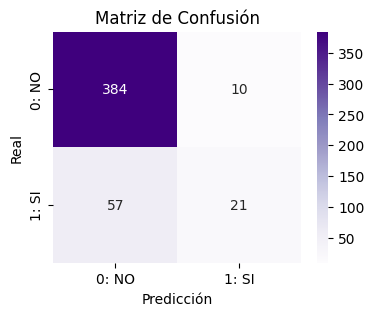

In [47]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

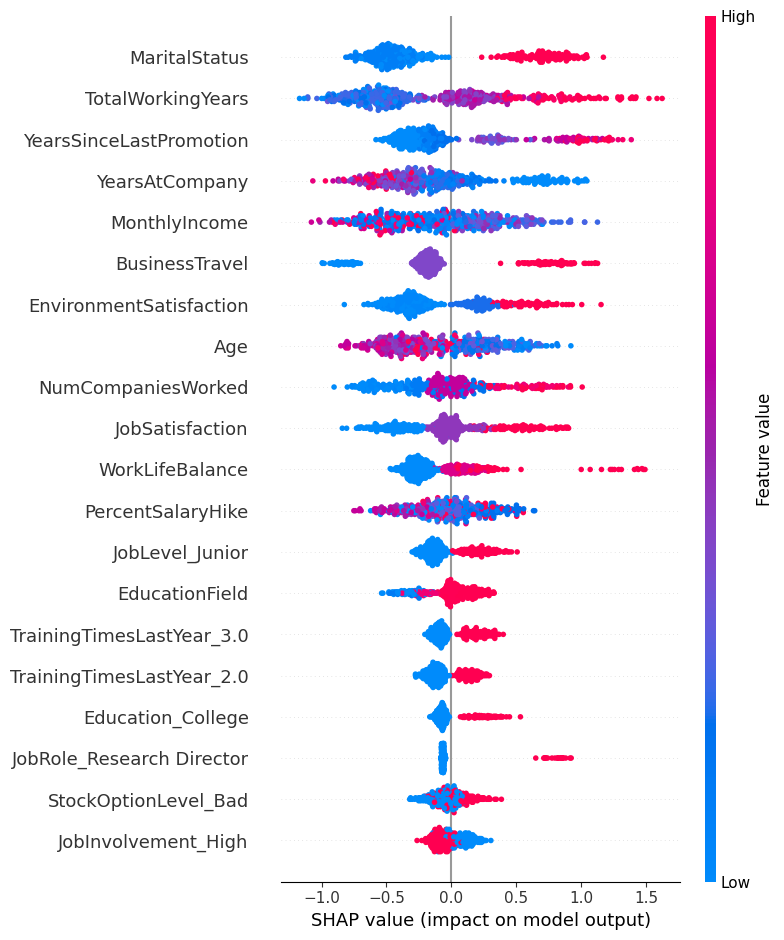

In [48]:
modelos_clasificacion.plot_shap_summary("xgboost")

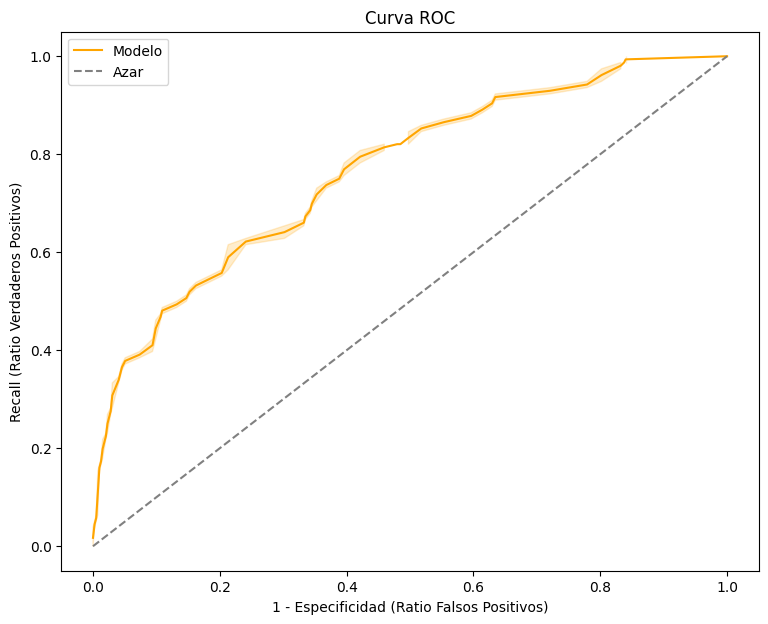

In [49]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

| Modelo     | Diff Accuracy | Diff Precision | Diff Recall | Diff F1  | Recall Test | Kappa Test | AUC Test |
|------------|---------------|----------------|-------------|----------|-------------|------------|----------|
| **A**      | 0.15          | 0.17           | 0.15        | 0.17     | 0.84        | 0.39       | 0.77     |
| **A.7**    | 0.13          | 0.16           | 0.13        | 0.16     | 0.85        | 0.28       | 0.76     |
| **B**      | 0.15          | 0.17           | 0.15        | 0.17     | 0.85        | 0.40       | 0.79     |
| **B.7**    | 0.14          | 0.16           | 0.14        | 0.17     | 0.86        | 0.32       | 0.77     |
| **C**      | 0.16          | 0.17           | 0.16        | 0.18     | 0.84        | 0.39       | 0.79     |
| **C.7**    | 0.12          | 0.14           | 0.12        | 0.15     | 0.86        | 0.34       | 0.77     |
| **D**      | 0.16          | 0.18           | 0.16        | 0.18     | 0.84        | 0.37       | 0.76     |
| **D.7**    | 0.12          | 0.14           | 0.12        | 0.15     | 0.86        | 0.32       | 0.77     |


### Conclusion de mejor XGBoost:  
  

*Tras observar todas las métricas de los modelos me cuestiono si usar el modelo B.7 o el modelo C.7*       
  
**Primera opción (equilibrio general): Modelo C.7**  

Tiene un alto recall (0.86) y un nivel aceptable de over fitting y un buen Kappa y AUC.


**Segunda opción (si quiero priorizar Kappa): Modelo B.7**  
Es bastante parecido pero con un peor equilibrio

#### ***Bajo mi criterio, prefiero el modelo C.7***  
